In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import sbm
from sbm import ScanFields
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Definision of cross-link

We define the cross-link as:

$$
{}_{n,m}\tilde{h} = \frac{1}{N_{\rm hits}}\sum_{j}e^{-i(n\psi_j+m\phi)}
= \langle \cos(n\psi_j+m\phi) \rangle + i\langle \sin(n\psi_j+m\phi) \rangle
$$

where $\psi$ and $\phi$ represent crossing/HWP angle, and $j$ represents $j^{\rm{th}}$ measurement in a sky pixel. $N_{\rm hits}$ represents number of hits in a sky pixel.

# Load cross-link HDF5file
In order to load the HDF5 file includes cross-link, SBM surpports two methods:
1. Specify direct path
    - `sbm.read_scanfiled(file_path)`
    - This way is usefull if you don't need to do multiple detector's simulation
2. Specify channel and detector name of LiteBIRD
    - `sbm.ScanFields.load_det(det_name=f"{channel}/{detector_name}", base_path="<root path of your database>")`
    - In this way, if you don't specify the `base_path`, the code will read `~/.config/sbm_dataset/sbm_dataset.toml`.

  The `base_path` is written in this toml file. 
  This toml file is generated after you installed the cross-link database's `base_path` by:
  ```
  python -m sbm.install_db
  ```
  This way makes you free to put long file path to specify a detector. 

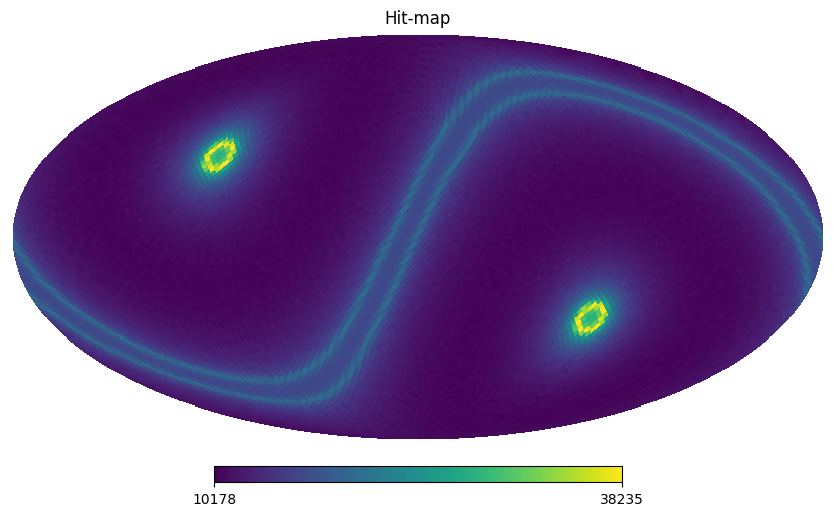

In [ ]:
# First way, everyones can execute this cell
test_xlink_path = Path(sbm.__file__).resolve().parent.parent/"tests"/"nside_32_boresight_hwp.h5"
sf_test = sbm.read_scanfiled(str(test_xlink_path))
hp.mollview(sf_test.hitmap, title="Hit-map")

In [16]:
# Second way, people who installed the base_path can execute this cell:
# Load single detector map
# It assumes that base_path has been installed to SBM by install_db()
# This method is useful if you have multiple detectors per channel.
filename1 = "L1-040/000_000_003_QA_040_T"
filename2 = "L1-040/000_004_005_UA_040_T"
sf1 = ScanFields.load_det(filename1)
sf2 = ScanFields.load_det(filename2)

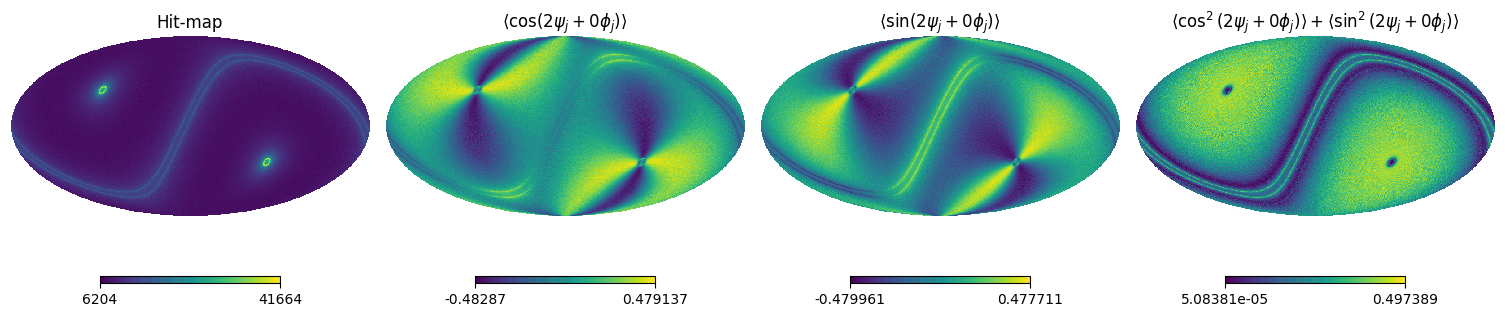

In [17]:
spin_n = 2
spin_m = 0
C = rf"$\langle \cos({spin_n}\psi_j + {spin_m}\phi_j)\rangle$"
S = rf"$\langle \sin({spin_n}\psi_j + {spin_m}\phi_j)\rangle$"
CS = rf"$\langle \cos^2({spin_n}\psi_j + {spin_m}\phi_j)\rangle + \langle \sin^2({spin_n}\psi_j + {spin_m}\phi_j)\rangle$"
plt.figure(figsize=(15, 12))
hp.mollview(sf1.hitmap, title="Hit-map", sub=(1, 4, 1))
hp.mollview(sf1.get_xlink(spin_n, spin_m).real, title=C, sub=(1, 4, 2))
hp.mollview(sf1.get_xlink(spin_n, spin_m).imag, title=S, sub=(1, 4, 3))
hp.mollview(np.abs(sf1.get_xlink(spin_n, spin_m)), title=CS, sub=(1, 4, 4))

# Scan-field operation

If you add two `Scanfield` instances, the hit-map and ${}_{n}\tilde{h}$ will be added by the special method: `__add__()`.

The hit-map is added by simple addition, and ${}_{n}\tilde{h}$ is added by weighted average:

$$
N_{\rm hits}^{\rm tot} = N_{\rm hits}^{(1)} + N_{\rm hits}^{(2)} \\
$$

$$
{}_{n}\tilde{h}^{\rm tot} = \frac{{}_{n}\tilde{h}^{(1)} N_{\rm hits}^{(1)} + {}_{n}\tilde{h}^{(2)} N_{\rm hits}^{(2)}}{N_{\rm hits}^{\rm tot}}
$$

where the number in $(.)$ represents a detector ID.


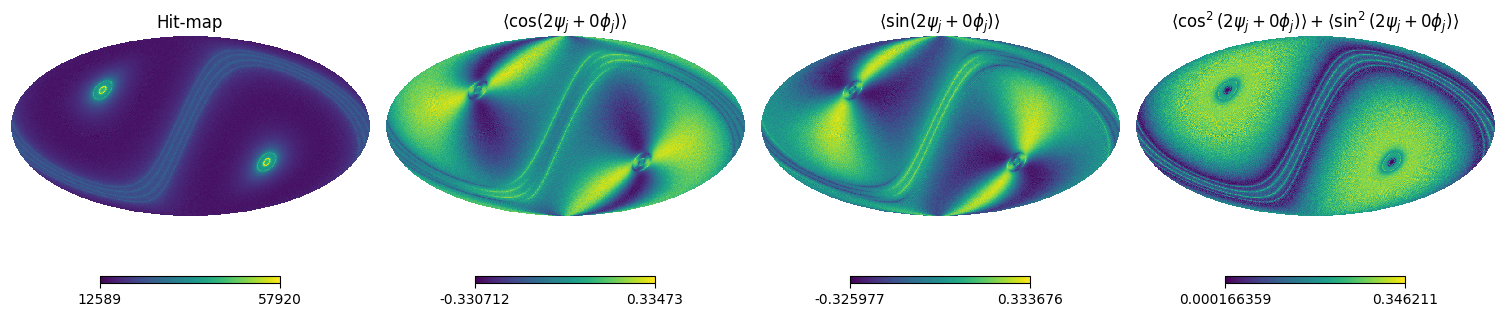

In [18]:
# add Scanfield instances
sf_sum = sf1 + sf2
spin_n = 2

plt.figure(figsize=(15, 12))
hp.mollview(sf_sum.hitmap, title="Hit-map", sub=(1, 4, 1))
hp.mollview(sf_sum.get_xlink(spin_n, spin_m).real, title=C, sub=(1, 4, 2))
hp.mollview(sf_sum.get_xlink(spin_n, spin_m).imag, title=S, sub=(1, 4, 3))
hp.mollview(np.abs(sf_sum.get_xlink(spin_n, spin_m)), title=CS, sub=(1, 4, 4))

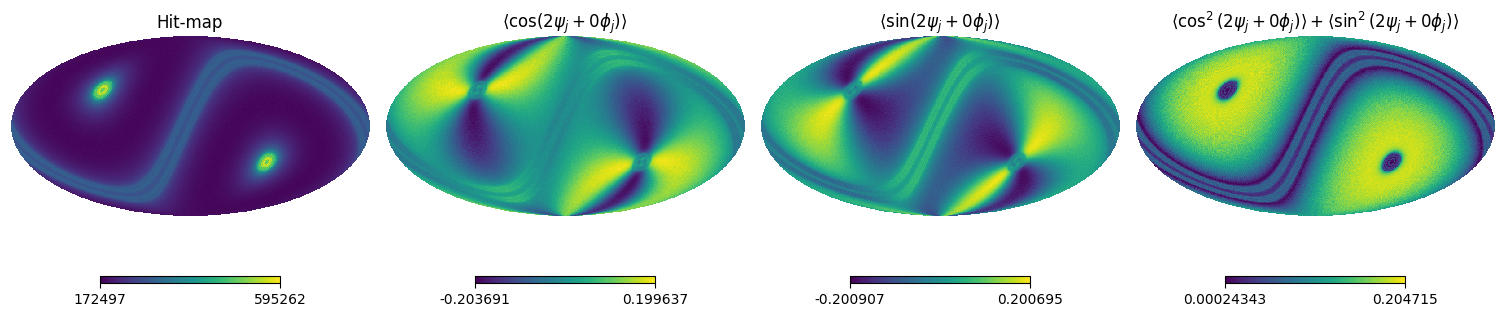

In [19]:
# Load maps per channel
# It assumes that base_path has been installed to SBM by install_db()
channel = "L1-040"
sf_ch = ScanFields.load_channel(channel)

spin_n = 2
plt.figure(figsize=(15, 12))
hp.mollview(sf_ch.hitmap, title="Hit-map", sub=(1, 4, 1))
hp.mollview(sf_ch.get_xlink(spin_n, spin_m).real, title=C, sub=(1, 4, 2))
hp.mollview(sf_ch.get_xlink(spin_n, spin_m).imag, title=S, sub=(1, 4, 3))
hp.mollview(np.abs(sf_ch.get_xlink(spin_n, spin_m)), title=CS, sub=(1, 4, 4))

In [ ]:
# It loads all the channels in parallel
sf_total = ScanFields.load_full_FPU(sbm.channel_list, base_path=sbm.DB_ROOT_PATH)

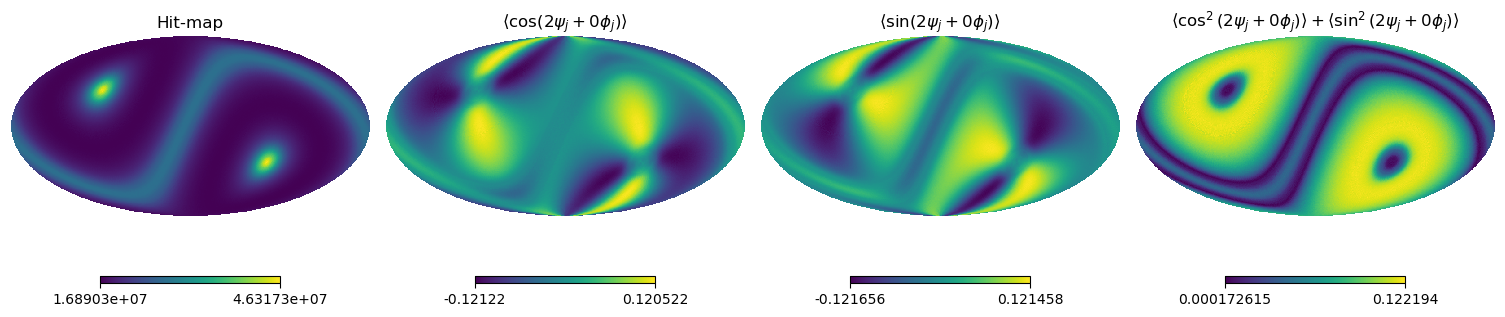

In [ ]:
plt.figure(figsize=(15, 12))
hp.mollview(sf_total.hitmap, title="Hit-map", sub=(1, 4, 1))
hp.mollview(sf_total.get_xlink(spin_n, spin_m).real, title=C, sub=(1, 4, 2))
hp.mollview(sf_total.get_xlink(spin_n, spin_m).imag, title=S, sub=(1, 4, 3))
hp.mollview(np.abs(sf_total.get_xlink(spin_n, spin_m)), title=CS, sub=(1, 4, 4))

## Note that few MHFT detectors cannot observe the ecliptic poles as bellow:


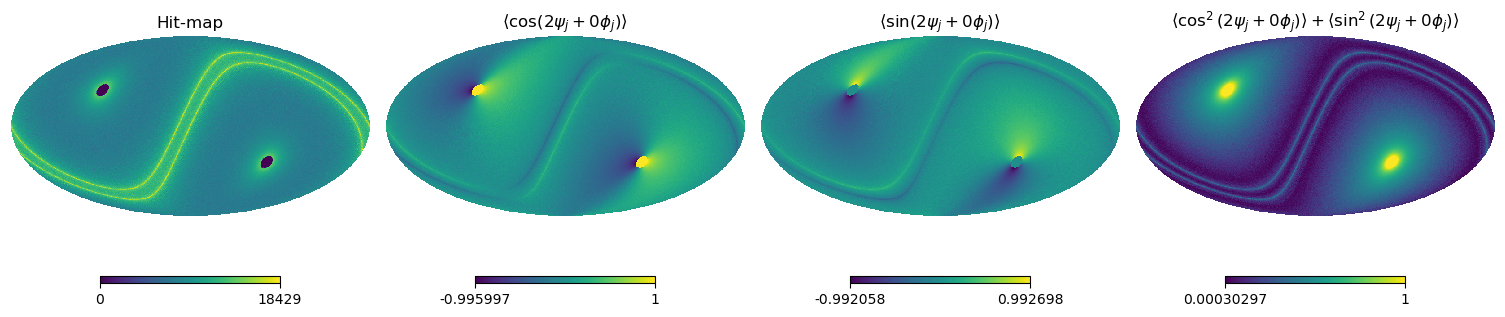

In [ ]:
sf = ScanFields.load_det("002_000_000_Q_195_T", base_path=sbm.DB_ROOT_PATH + "/H1-195")

spin_n = 1
plt.figure(figsize=(15, 12))
hp.mollview(sf.hitmap, title="Hit-map", sub=(1, 4, 1))
hp.mollview(sf.get_xlink(spin_n, spin_m).real, title=C, sub=(1, 4, 2))
hp.mollview(sf.get_xlink(spin_n, spin_m).imag, title=S, sub=(1, 4, 3))
hp.mollview(np.abs(sf.get_xlink(spin_n, spin_m)), title=CS, sub=(1, 4, 4))

# How to make a full-focal plane data

We generated the total scanfield as:

`sf_total = Scanfield_total(base_path, channel_list)`

However, this data is including only the top-detectors, so we must consider the bottom-detectors as well, which has 90 degrees sifted polarization angle.

So now, we can use `Scanfield` sumation and top-to-bottom comverter i.e. `.t2b()` method.

Note that `spin-2` corss-link cancels out.


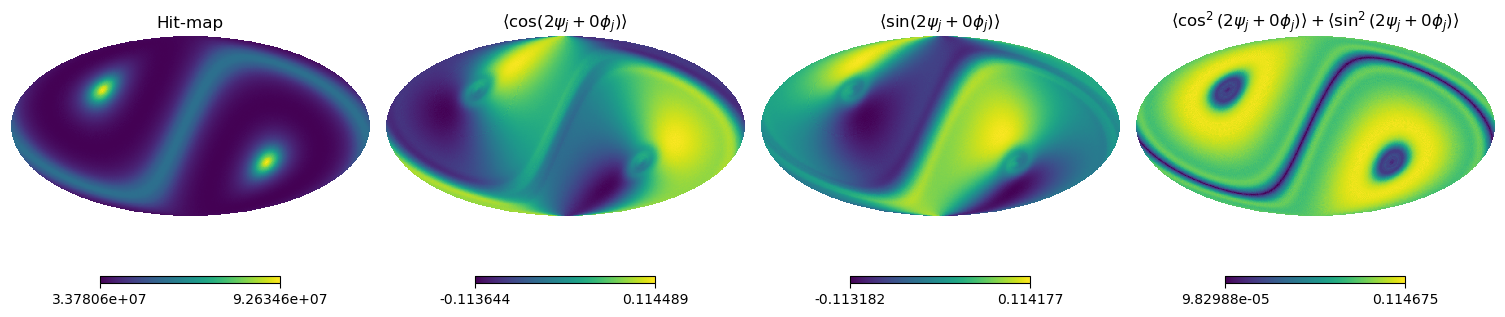

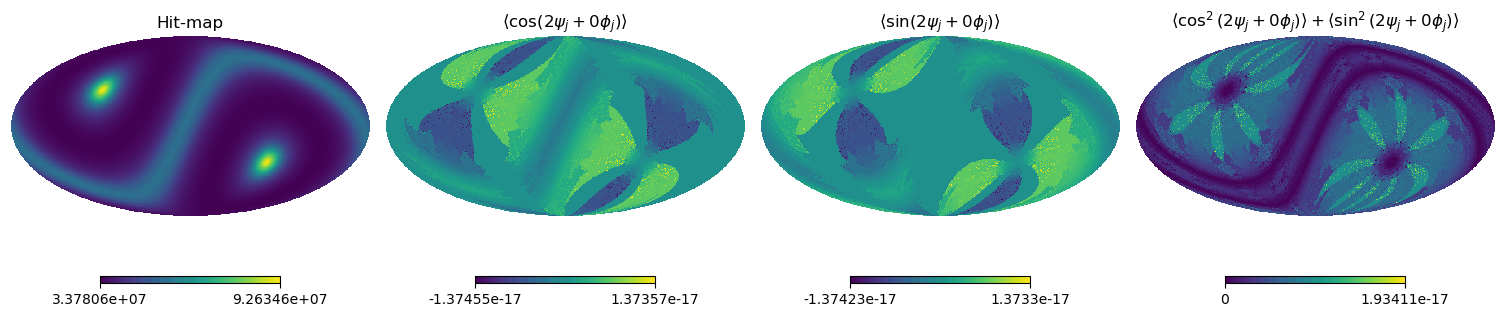

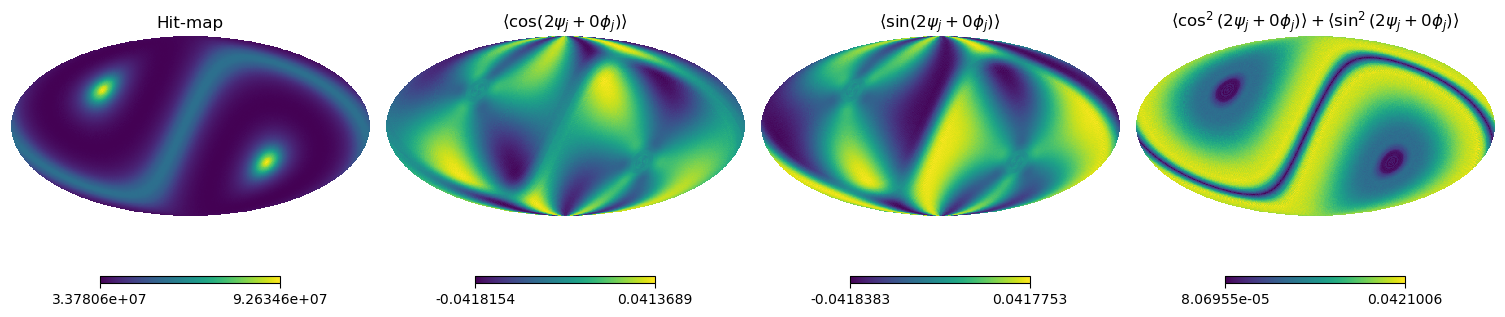

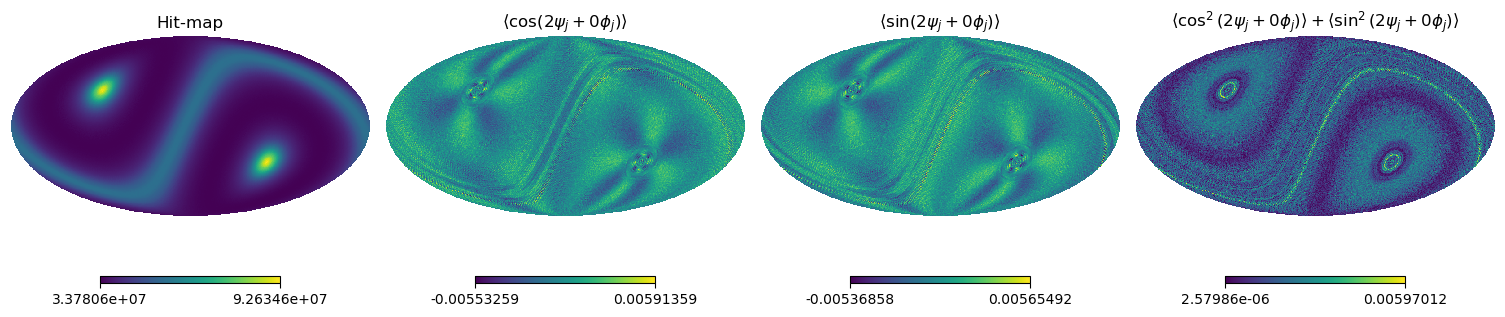

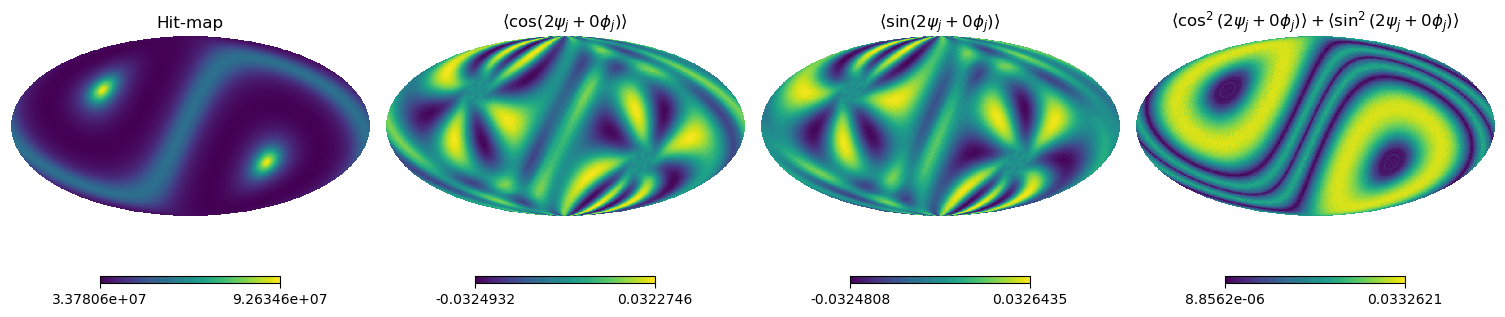

In [ ]:
sf_full = sf_total + sf_total.t2b()

for spin_n in range(1, 6):
    plt.figure(figsize=(15, 12))
    hp.mollview(sf_full.hitmap, title="Hit-map", sub=(1, 4, 1))
    hp.mollview(sf_full.get_xlink(spin_n, spin_m).real, title=C, sub=(1, 4, 2))
    hp.mollview(sf_full.get_xlink(spin_n, spin_m).imag, title=S, sub=(1, 4, 3))
    hp.mollview(np.abs(sf_full.get_xlink(spin_n, spin_m)), title=CS, sub=(1, 4, 4))